In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import joblib

In [3]:
data = pd.read_csv('iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df = data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.shape

(400, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [13]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

- sns.pairplot (seaborn) : rasme matrix nemodar haye parakandi.

- hue='Purchase Iphone' : data ha bar asase 'Purchase Iphone' in soton dastebandi mishavand.


- vars=['Age', 'Salary'] : faghat beyne in 2 var nemodar parakandegi rasm mishvd.


- palette='husl' : palte rangi.

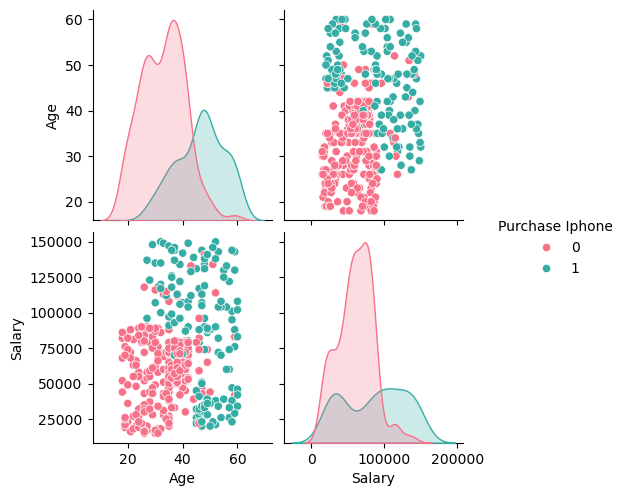

In [12]:
sns.pairplot(data, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig('pair plot.png')
plt.show()

- sns.countplot (seaborn): rasme nemodare sotoni shomareshi.

- x='Gender' : mehvare ofoghi nemodar bar asase 'Gender'.

- hue='Purchase Iphone' : sotone 'Purchase Iphone' baraye rangbandi estefade mishavad, dakhele har soton (Gender) bar asase in ke kasi iphone kharide ya na daste bandie rangi mishavad.


- data = data : dataframe ro moshakhas mikonad.

- palette='Set2': palte rangi.

- plt.savefig : save nemodare sakhte shode.

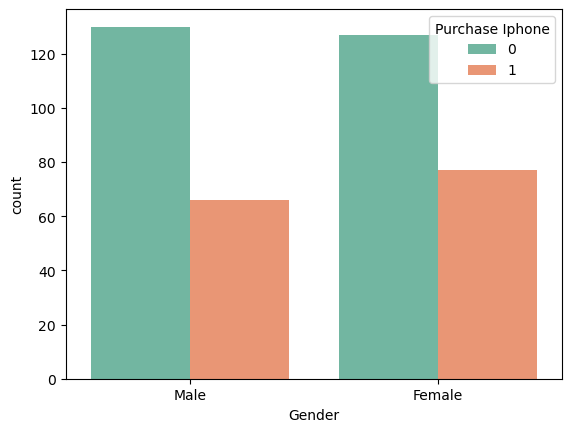

In [17]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig('gender countplot.png')
plt.show()

- Model Building
- KNN

In [18]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [20]:
X = data[['Age','Salary']]
X

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [21]:
y = data['Purchase Iphone']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [32]:
X_train

,Age,Salary
33,28,44000
253,37,146000
118,40,59000
300,58,38000
115,40,57000
...,...,...
204,58,101000
53,35,23000
294,35,57000
211,52,150000


In [27]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

data.shape[0] : tedade radif 

data.shape[1] : tedade soton 

sqrt(shape[0]) : rishe 2 tedade radif ha. 

- estefade az in code baes mishe ke meghdare monaseb brye K moshakhs shavd

In [28]:
from math import sqrt #Standard Method to select K 
sqrt(data.shape[0])

20.0

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [31]:
knn_pred = knn_model.predict(X_test)
knn_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

- Accuracy : deghat.

In [37]:
knn_acc = round(accuracy_score(y_test,knn_pred) * 100, 2)
knn_acc

87.5

- precision_score: deghate mosbat.

In [40]:
knn_precision = round(precision_score(y_test,knn_pred) * 100, 2)
knn_precision

86.96

- annot=True : dakhele har khane addade marbote neveshte mishavd.

<Axes: >

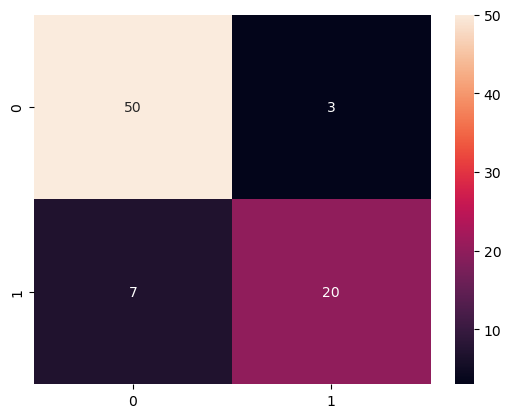

In [41]:
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True)

- Error method Also called as Elbow Method

- Erro : ( 1 - accuracy_score )

In [43]:
error = []
for i in range(1,31): #considering k value from 1 to 30 
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    knn_predict_i = knn_model.predict(X_test)
    error.append(1 - accuracy_score(y_test,knn_predict_i))
error

[0.23750000000000004,
 0.22499999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.13749999999999996,
 0.15000000000000002,
 0.16249999999999998,
 0.125,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.16249999999999998,
 0.17500000000000004,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.17500000000000004,
 0.17500000000000004]

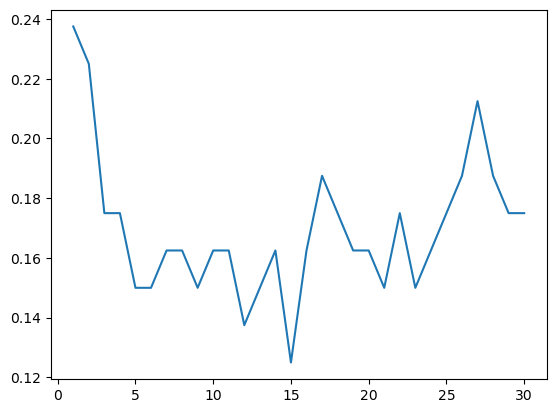

In [44]:
import matplotlib.pyplot as plt 
plt.plot(range(1,31), error)

- LogisticRegression

In [52]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train,y_train)
lg_pred = lg_model_fit.predict(X_test)
lg_model

LogisticRegression()

In [49]:
lg_acc = round(accuracy_score(y_test,lg_pred) * 100, 2)
lg_acc

83.75

- Decision Tree

In [63]:
dt_model = DecisionTreeClassifier()
dt_model_fit = dt_model.fit(X_train,y_train)
dt_pred = dt_model_fit.predict(X_test)
print(dt_pred)
dt_model

[0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0]


DecisionTreeClassifier()

In [55]:
dt_acc = round(accuracy_score(y_test,dt_pred) * 100, 2)
dt_acc

82.5

In [57]:
dt_precision = round(precision_score(y_test,dt_pred) * 100, 2)
dt_precision

70.97

- Random Forest

In [64]:
rf_model = RandomForestClassifier()
rf_model_fit = rf_model.fit(X_train,y_train)
rf_pred = rf_model_fit.predict(X_test)
print(rf_predict)
rf_model

[0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


RandomForestClassifier()

In [66]:
rf_acc = round(accuracy_score(y_test,rf_pred) * 100, 2)
rf_acc

85.0

In [67]:
rf_precision = round(precision_score(y_test,rf_pred) * 100, 2)
rf_precision

74.19

- Saving the Model

In [70]:
filname_knn = 'KNN_Model.sav'
joblib.dump(knn_model,filname_knn)

['KNN_Model.sav']

In [71]:
filename_dt = 'DecisionTree_Model.sav'
joblib.dump(dt_model,filename_dt)

['DecisionTree_Model.sav']

In [72]:
filename_rf = 'randomForest_model.sav'
joblib.dump(rf_model,filename_rf)

['randomForest_model.sav']

In [ ]:
filename_lg = 'logistic_model.sav'
joblib.dump()